#IA376N

Profa. Dra. Paula D. Paro Costa
Depto. de Eng. de Computação e Automação (DCA)
Faculdade de Engenharia Elétrica e de Computação (FEEC)
paulad@unicamp.br


#Nome dos integrantes da equipe:

*   José Carlos Ferreira. RA: 170860
*   Byron Alejandro Acuña Acurio. RA: 209428



#Projeto A1 : Proposta de Modelo de Síntese de Dado Tabular em Saúde

Esta atividade pode ser realizada individualmente ou em duplas (em caso de entrega em dupla, pede-se que apenas um dos membros da dupla realize a entrega e indique isso explicitamente no campo de comentários da entrega).
Atente-se ao horário de entrega da atividade!

O objetivo é que você proponha e gere um banco de dados sintéticos de resultados de exames de hemograma.
Não precisa ser uma abordagem baseada em deep learning, pode ser uma abordagem baseada em regras ou em modelos estatísticos clássicos.

Seguem anexadas três planilhas extraídas de uma base de resultados de exames de laboratório de análises clínicas.
São dados reais obtidos de um hemocentro do estado de São Paulo (e podem exigir etapas de limpeza de dados).
Campos de identificação foram transformads para fins de anonimização completa dos pacientes.

Proponha um método, implemente e apresente uma base de dados sintética com, no mínimo, 1000 resultados de exames fictícios.

Simplificação admitida: sintetizar apenas um dos parâmetros do hemograma.
Outras simplificações devem ser devidamente justificadas.
Deverá ser entregue um notebook Google Colab, explicitando e explicando sua implementação.

Responda à seguinte pergunta: como você garante que a sua síntese de dados é realista?
Explicite os critérios utilizados.

Sugere-se que o material suplementar anexo seja estudado, mas adianta-se que o mesmo não contêm a solução do problema.
Servem apenas como uma introdução a aspectos relevantes a serem considerados na síntese de sinais e um exemplo de abordagem na saúde.

# Workflow

A metodologia de trabalho adotada e que está documentada nesse relatório consistiu das seguintes
etapas

1.   Analise exploratória de dados e pré processamento
2.   Definição de possíveis modelos para o problema
3.   Simulação e análise de convergência
4.   Validação do modelo
5.   Conclusão e possíveis melhoras no modelo

#1. Analise exploratória de dados e pré processamento

In [5]:
!git clone https://github.com/byronacunia/A1.git

Cloning into 'A1'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 2.61 MiB | 5.30 MiB/s, done.


# Librerias de python usadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [3]:
def expand_hemogram_data(df):
    # Initialize new DataFrame with unique patient ID and exam date
    expanded_df = df[['data do exame', 'idade', 'ID do paciente', 'sexo']].drop_duplicates().reset_index(drop=True)

    # List of columns to add based on different types of exams
    exam_columns = df['tipo de exame'].unique()

    # Initialize these columns with NaN
    for col in exam_columns:
        expanded_df[col] = np.nan

    # Fill in the values based on the 'tipo de exame'
    for index, row in df.iterrows():
        patient_id = row['ID do paciente']
        exam_date = row['data do exame']
        exam_type = row['tipo de exame']
        exam_result = row['resultado do exame']

        # Check if the exam_type is in the exam_columns list
        if exam_type not in exam_columns:
            continue

        # Find the matching row(s) in expanded_df
        match_index = expanded_df[(expanded_df['ID do paciente'] == patient_id) & (expanded_df['data do exame'] == exam_date)].index

        # Assign the exam result to the appropriate column for each matching index
        for idx in match_index:
            expanded_df.at[idx, exam_type] = exam_result

    return expanded_df

In [6]:
# Define file paths and column names
file_paths = ['./A1/data1.csv', './A1/data2.csv', './A1/data3.csv']  # Update with your file paths
column_names = ['data do exame', 'idade', 'ID do paciente', 'sexo', 'tipo de exame', 'resultado do exame']

# Initialize an empty list to store dataframes
dataframes = []

# Loop through file paths to load data
for file_path in file_paths:
    data = pd.read_csv(file_path, names=column_names)

    # Data cleaning steps
    data['data do exame'] = pd.to_datetime(data['data do exame'], errors='coerce')
    data['resultado do exame'] = data['resultado do exame'].str.strip()
    data['resultado do exame'] = data['resultado do exame'].str.replace(',', '.')
    data['resultado do exame'] = pd.to_numeric(data['resultado do exame'], errors='coerce')

    # Drop rows with missing values
    data = data.dropna()

    # Append cleaned dataframe to the list
    dataframes.append(expand_hemogram_data(data))

In [7]:
combined_dataframe = pd.concat(dataframes)

In [8]:
combined_dataframe

,data do exame,idade,ID do paciente,sexo,PLAQUETAS SANGUE,NEUTRÓFILOS ABSOLUTO,LINFÓCITOS ABSOLUTO,NEUTRÓFILOS %,LINFÓCITOS %,MCHC,EOSINÓFILOS ABSOLUTO,NEUTRÓFILOS SEGMENTADOS %,LINFOCITOS ATIPICOS TOTAL %,PLASMÓCITOS ABSOLUTO,PLASMÓCITOS%,LEUCÓCITOS TOTAIS,LUC ABSOLUTO,LUC %
0,2021-10-24 00:33:00,19,20850235,F,316.0,9.9006,1.1380,87.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-24 00:33:00,70,16084789,M,239.0,2.3423,1.1919,50.7,25.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-24 00:33:00,62,25926519,F,166.0,9.2064,0.9864,84.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-24 00:33:00,49,20209887,M,201.0,3.2026,2.7001,47.8,40.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-24 00:33:00,50,25722538,M,319.0,7.3983,3.6560,60.1,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23950,2021-10-23 22:14:00,74,24902634,M,595.0,14.5620,0.6472,90.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23951,2021-10-23 22:14:00,51,25881631,M,115.0,2.8662,1.0100,64.7,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23952,2021-10-23 22:14:00,18,25932729,M,307.0,12.8370,1.5015,77.8,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23953,2021-10-23 22:21:00,95,25932815,M,316.0,10.5425,0.2348,89.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

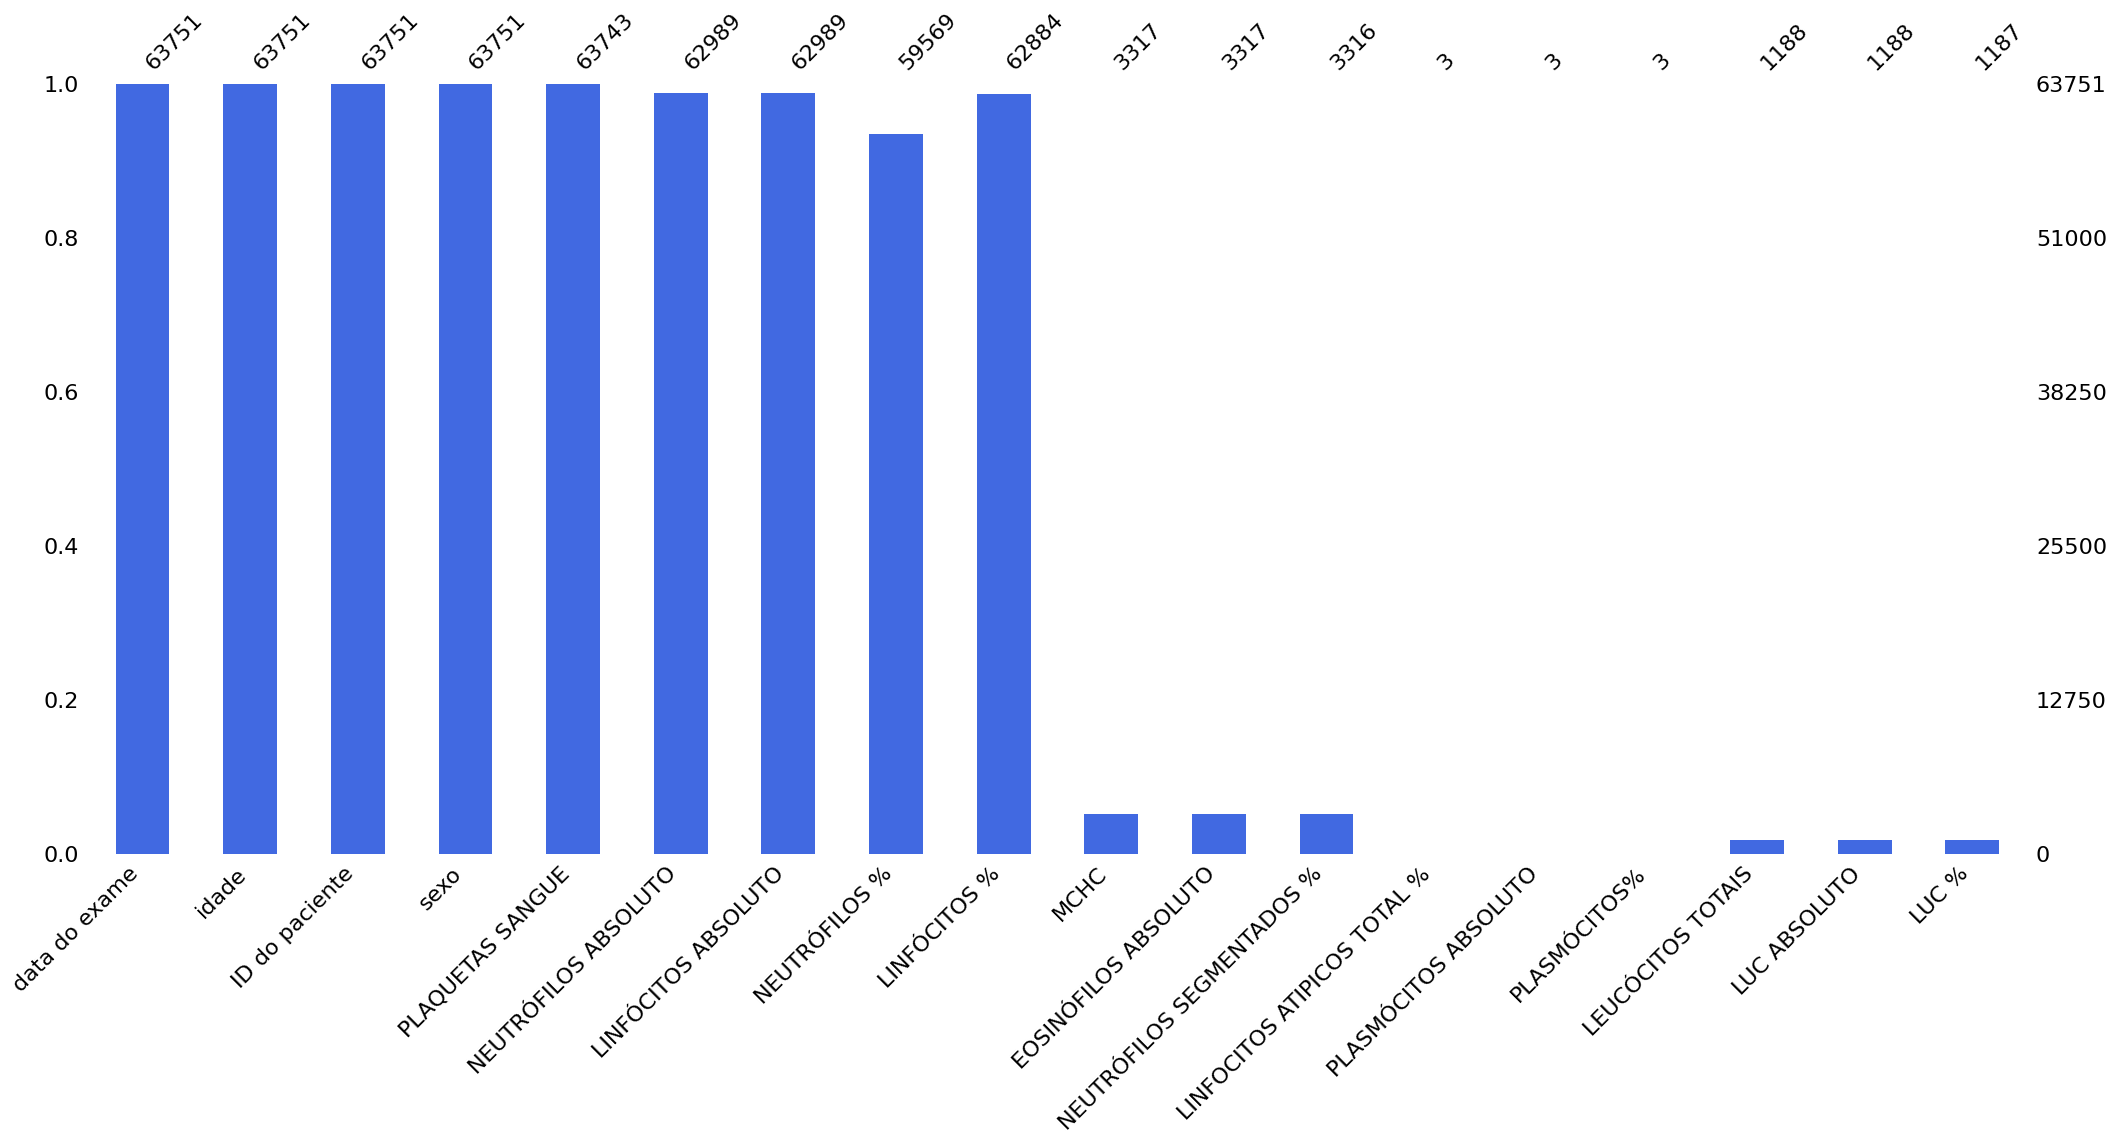

In [9]:
msno.bar(combined_dataframe, color="RoyalBlue") #para visualizar a integridade do datafram

In [10]:
def split_dataframe(df):
    # Identifying patient IDs that occur only once
    unique_patients = df['ID do paciente'].value_counts()[df['ID do paciente'].value_counts() == 1].index

    # DataFrame with rows where 'ID do paciente' occurs only once
    df_unique = df[df['ID do paciente'].isin(unique_patients)]

    # DataFrame with the rest of the rows
    df_non_unique = df[~df['ID do paciente'].isin(unique_patients)]

    return df_unique, df_non_unique

# Applying the function to the sample DataFrame
df_unique, df_non_unique = split_dataframe(combined_dataframe)

<Axes: >

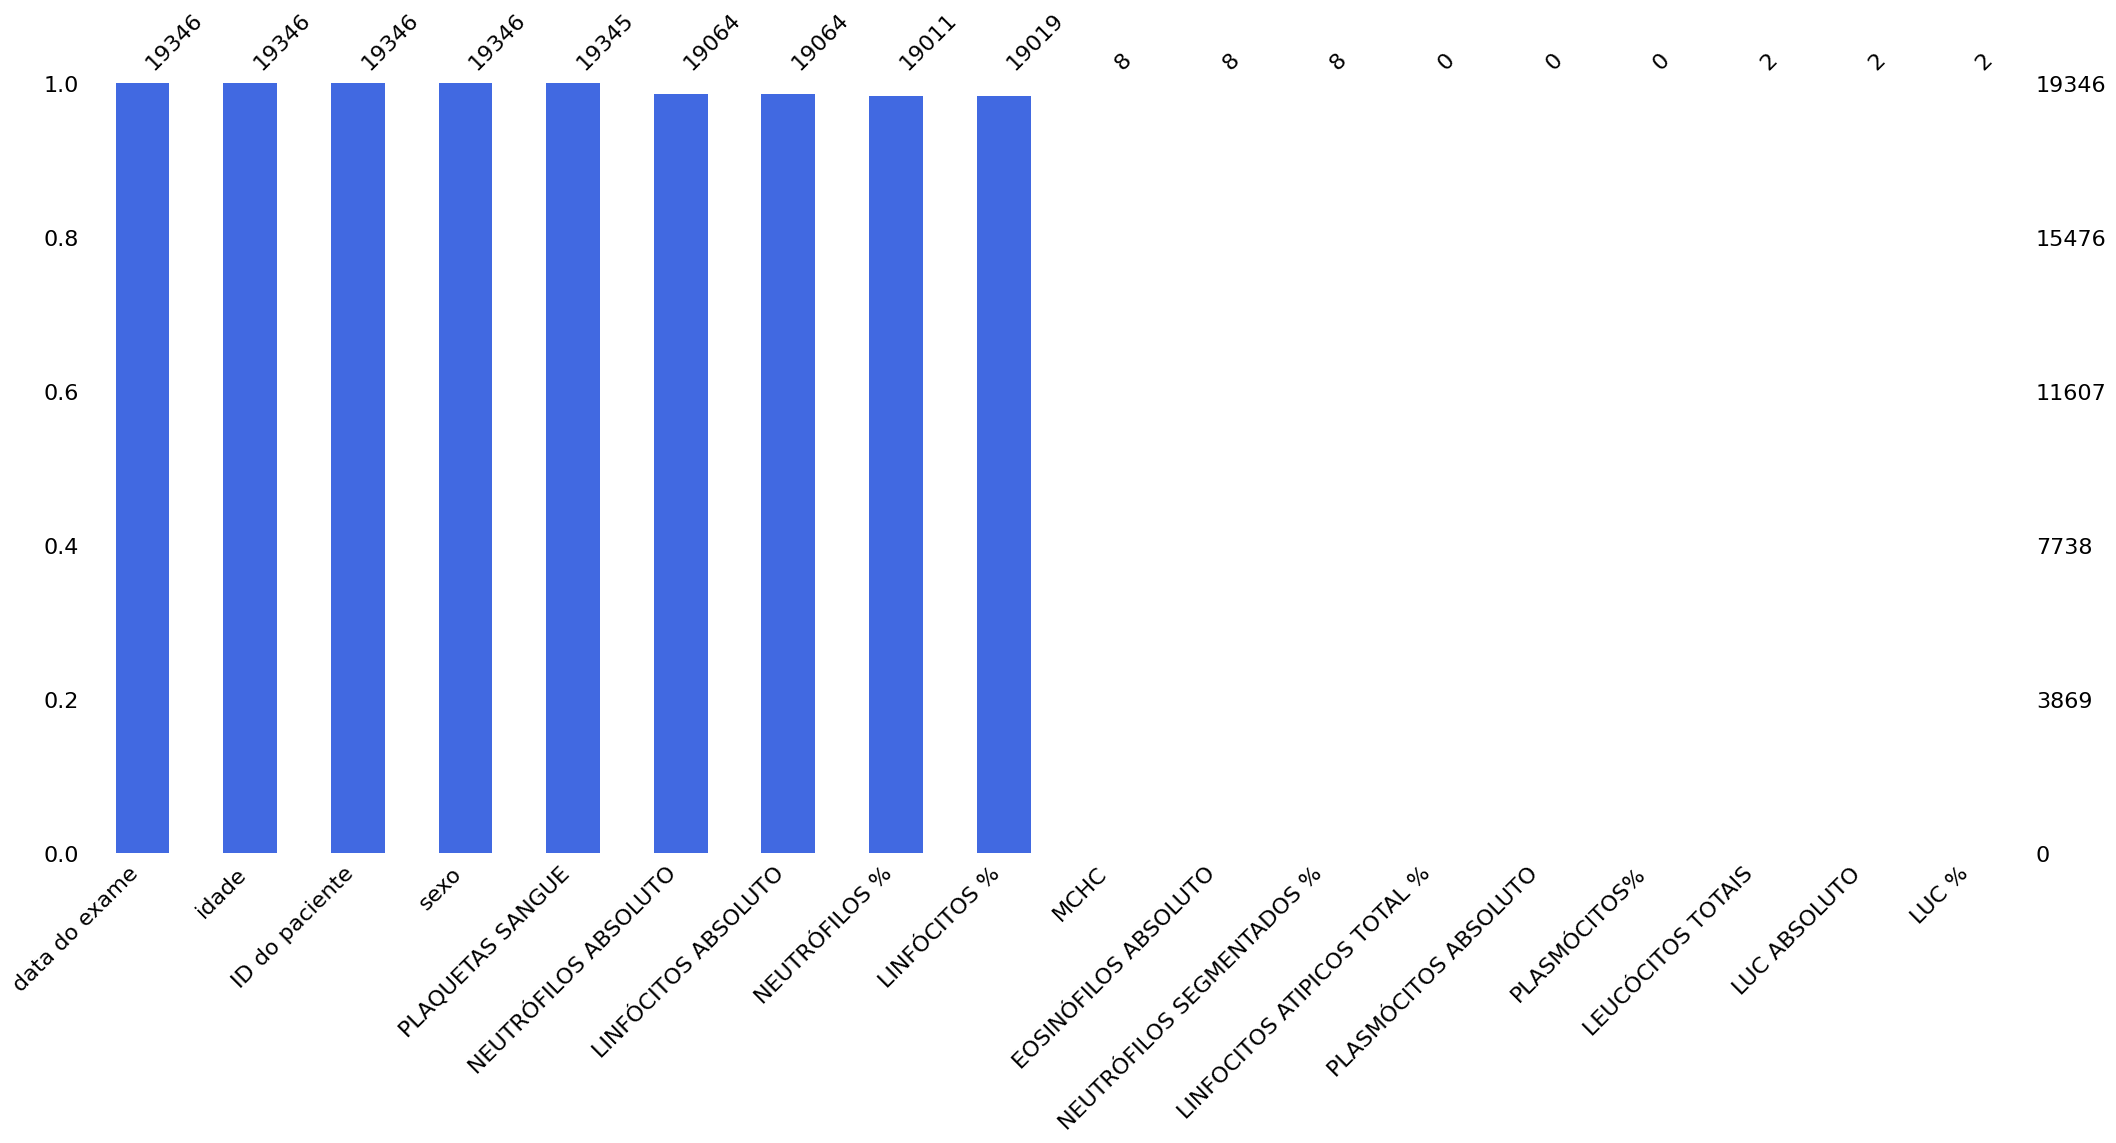

In [11]:
msno.bar(df_unique, color="RoyalBlue") #para visualizar a integridade do datafram

<Axes: >

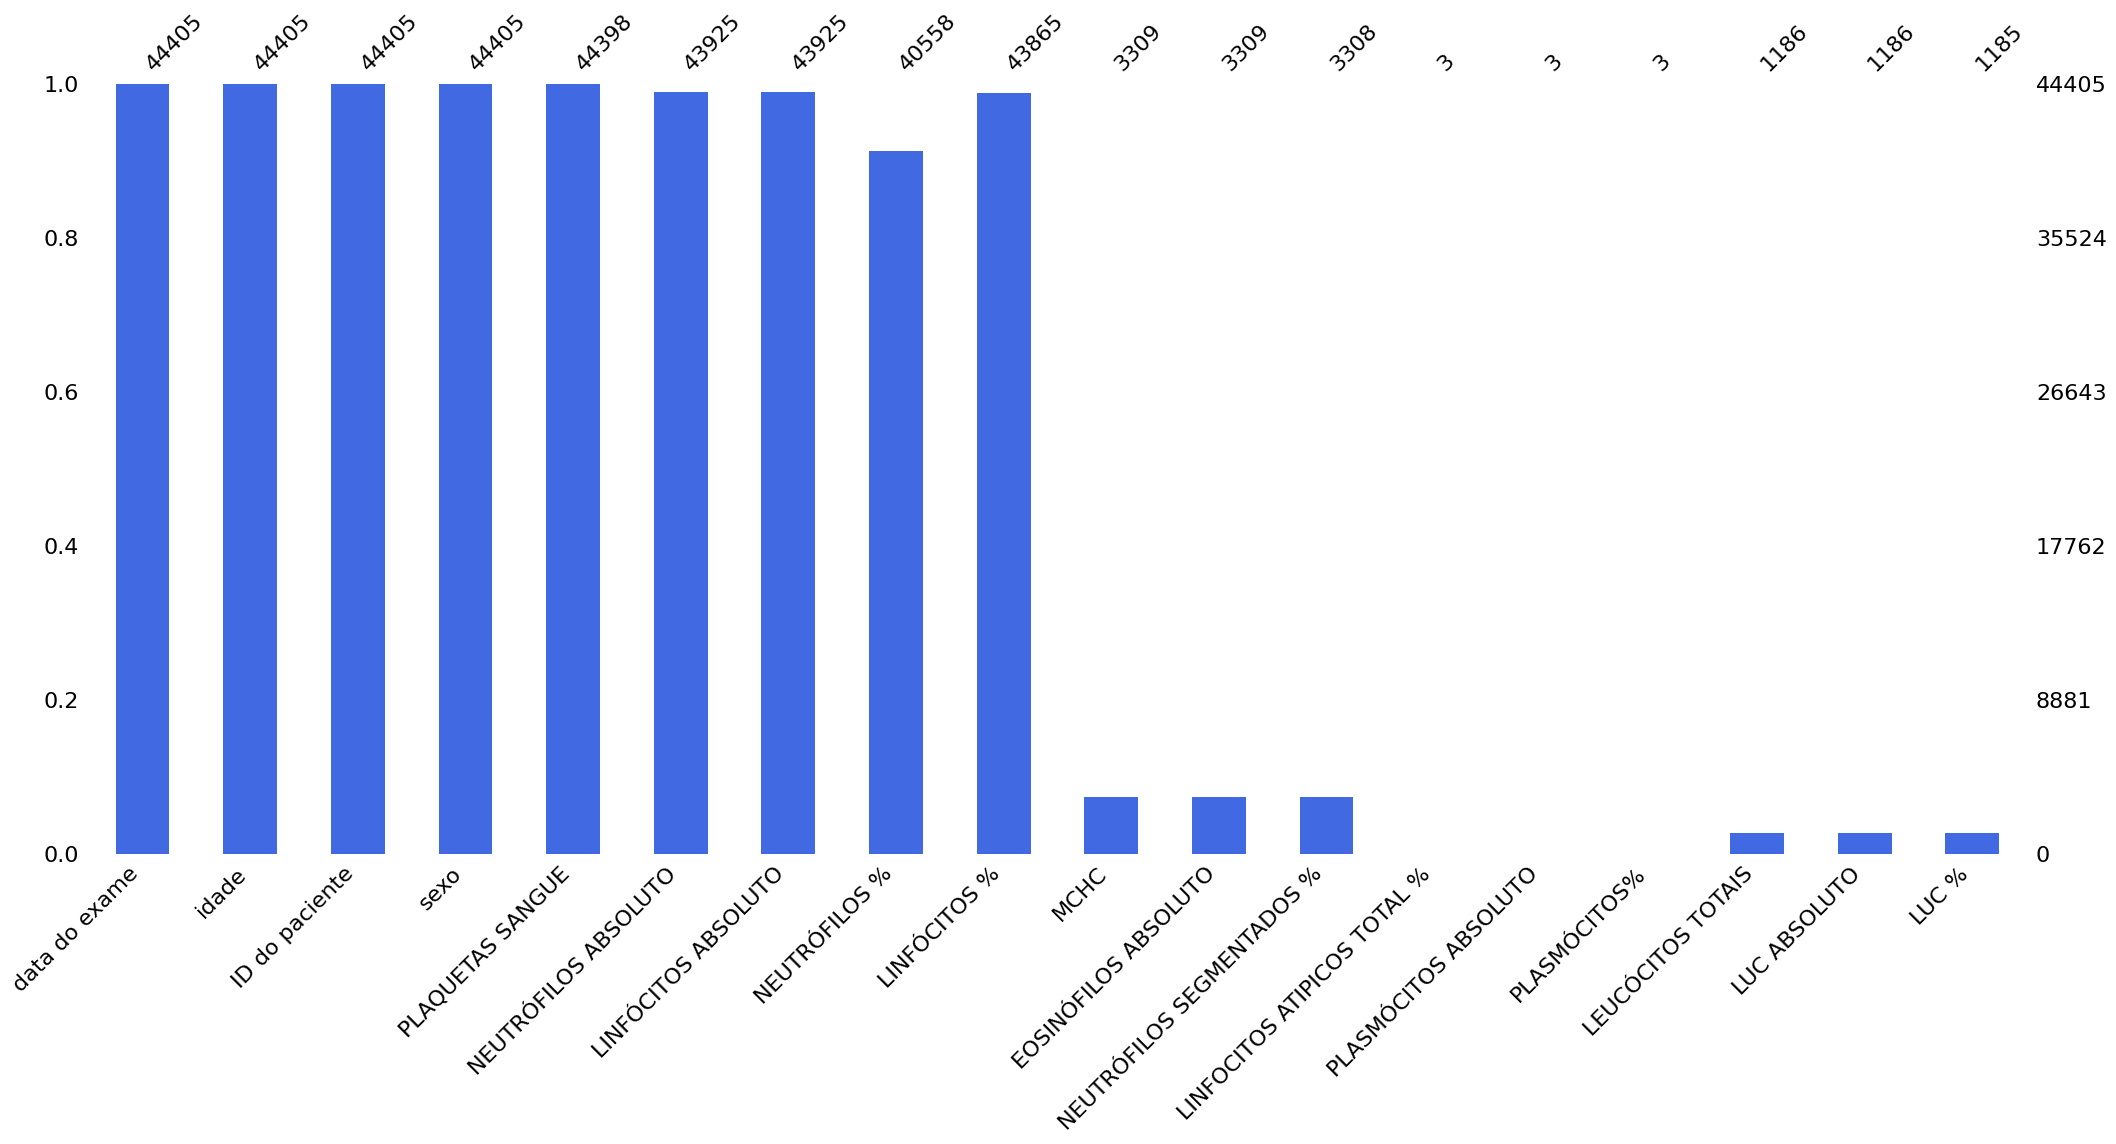

In [12]:
msno.bar(df_non_unique, color="RoyalBlue") #para visualizar a integridade do datafram

In [13]:
combined_dataframe.columns

Index(['data do exame', 'idade', 'ID do paciente', 'sexo', 'PLAQUETAS SANGUE',
       'NEUTRÓFILOS ABSOLUTO', 'LINFÓCITOS ABSOLUTO', 'NEUTRÓFILOS %',
       'LINFÓCITOS %', 'MCHC', 'EOSINÓFILOS ABSOLUTO',
       'NEUTRÓFILOS SEGMENTADOS %', 'LINFOCITOS ATIPICOS TOTAL %',
       'PLASMÓCITOS ABSOLUTO', 'PLASMÓCITOS%', 'LEUCÓCITOS TOTAIS',
       'LUC ABSOLUTO', 'LUC %'],
      dtype='object')

In [14]:
ranked_ids_combined_dataframe = combined_dataframe['ID do paciente'].value_counts()
ranked_ids_combined_dataframe

,count
ID do paciente,
99999999,1031
25843342,104
25883509,79
25361461,73
19962424,70
...,...
19291432,1
25376559,1
25338612,1


In [15]:
ranked_ids_df_unique = df_unique['ID do paciente'].value_counts()
ranked_ids_df_unique

,count
ID do paciente,
16084789,1
25699364,1
25851454,1
25851545,1
23056593,1
...,...
23560857,1
25364231,1
22877928,1


In [16]:
ranked_ids_df_non_unique = df_non_unique['ID do paciente'].value_counts()
ranked_ids_df_non_unique

,count
ID do paciente,
99999999,1031
25843342,104
25883509,79
25361461,73
19962424,70
...,...
23747491,2
12716265,2
23832260,2
